<a href="https://colab.research.google.com/github/yucellgereklioglu/datasciencework/blob/main/Colaboratory'ye_Ho%C5%9F_Geldiniz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [3]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [4]:
train.tail(1)

,id,date,country,store,product,num_sold
67393,67393,2012-01-19,Nor,NaN,NaN,NaN


In [5]:
le=LabelEncoder()
train['country']=le.fit_transform(train['country'])
train['store']=le.fit_transform(train['store'])
train['product']=le.fit_transform(train['product'])

In [6]:
train['date']=pd.to_datetime(train['date'])
train['year']=train['date'].dt.year
train['month']=train['date'].dt.month
train['day']=train['date'].dt.day
train['dayofweek']=train['date'].dt.dayofweek

In [7]:
test['country']=le.fit_transform(test['country'])
test['store']=le.fit_transform(test['store'])
test['product']=le.fit_transform(test['product'])


In [8]:
test['date']=pd.to_datetime(test['date'])
test['year']=test['date'].dt.year
test['month']=test['date'].dt.month
test['day']=test['date'].dt.day

In [9]:
y=train['num_sold']
x=train.drop(['num_sold','date'],axis=1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [11]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(x_train, y_train, epochs=4, batch_size=8, validation_split=0.24, verbose=1)

Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5122/5122 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/4
5122/5122 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/4
5122/5122 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/4
5122/5122 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan


In [12]:
y_pred=model.predict(x_test)

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [13]:
y_test = pd.DataFrame(y_test).fillna(0).values
x_test = pd.DataFrame(x_test).fillna(0).values
x_train = pd.DataFrame(x_train).fillna(0).values
y_train = pd.DataFrame(y_train).fillna(0).values

In [14]:
y_pred=pd.DataFrame(y_pred).fillna(0).values

In [15]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE Keras:", mape)

MAPE Keras: 0.9536315750426589


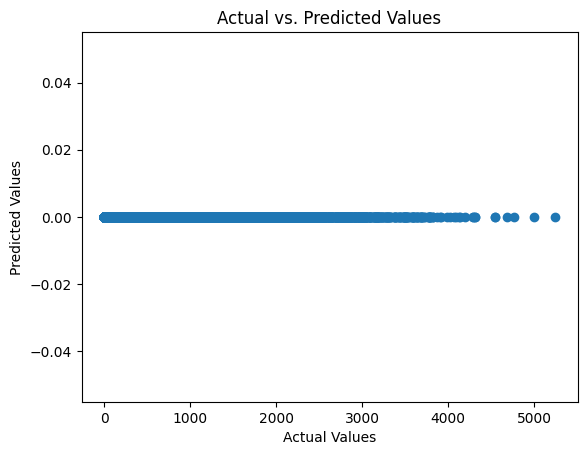

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

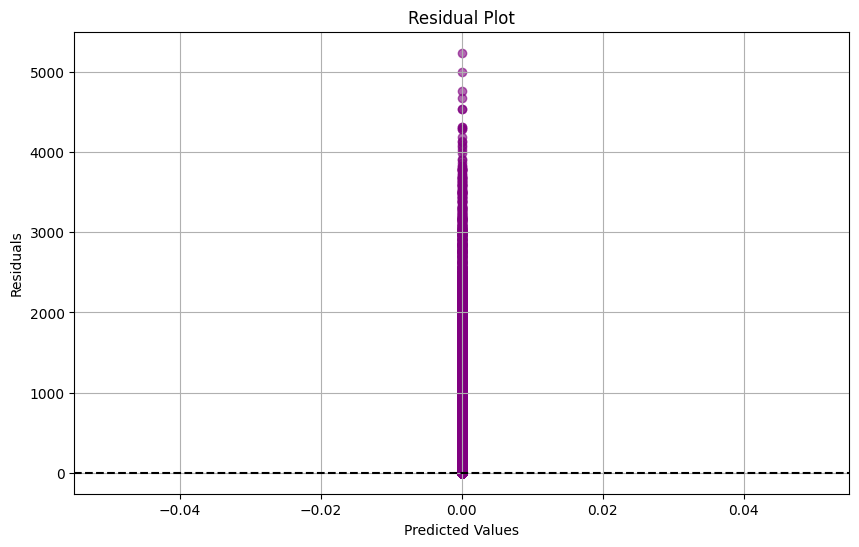

In [26]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


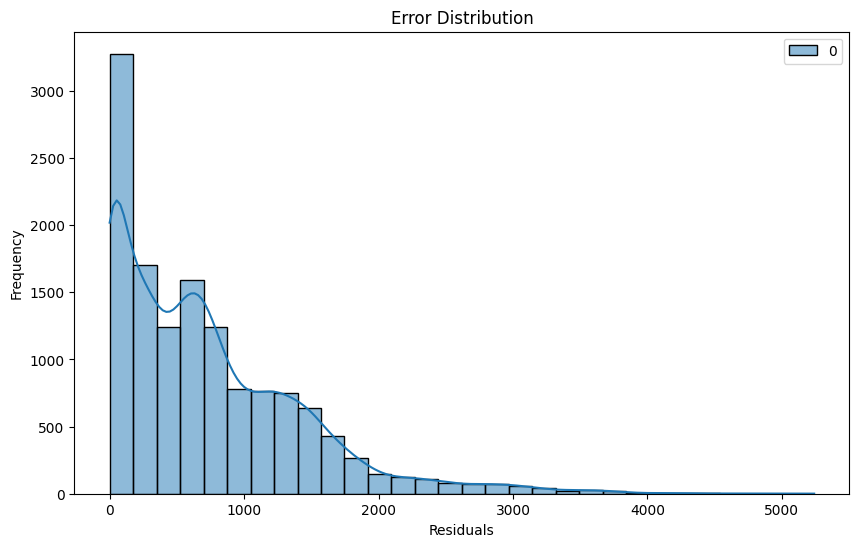

In [31]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='black', bins=30)
plt.title('Error Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


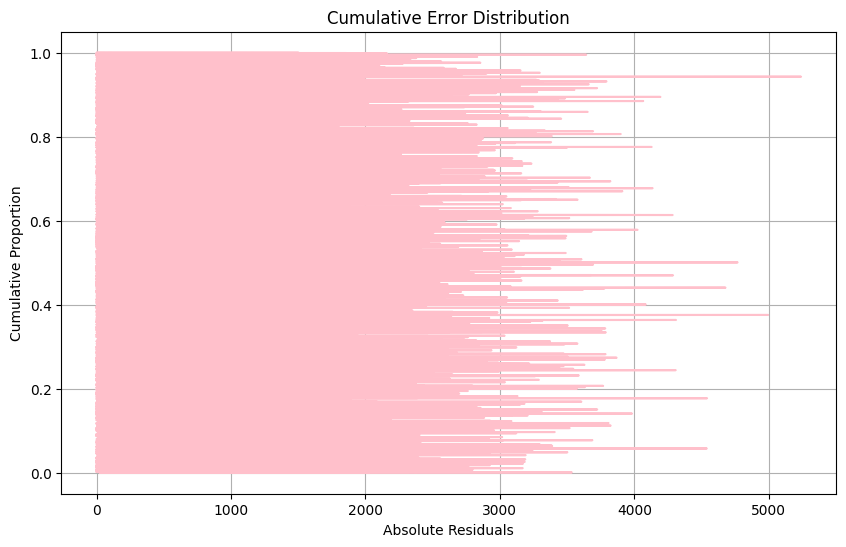

In [30]:
sorted_errors = np.sort(np.abs(residuals))
cumulative = np.cumsum(sorted_errors) / np.sum(sorted_errors)

plt.figure(figsize=(10, 6))
plt.plot(sorted_errors, cumulative, color='pink')
plt.title('Cumulative Error Distribution')
plt.xlabel('Absolute Residuals')
plt.ylabel('Cumulative Proportion')
plt.grid(True)
plt.show()


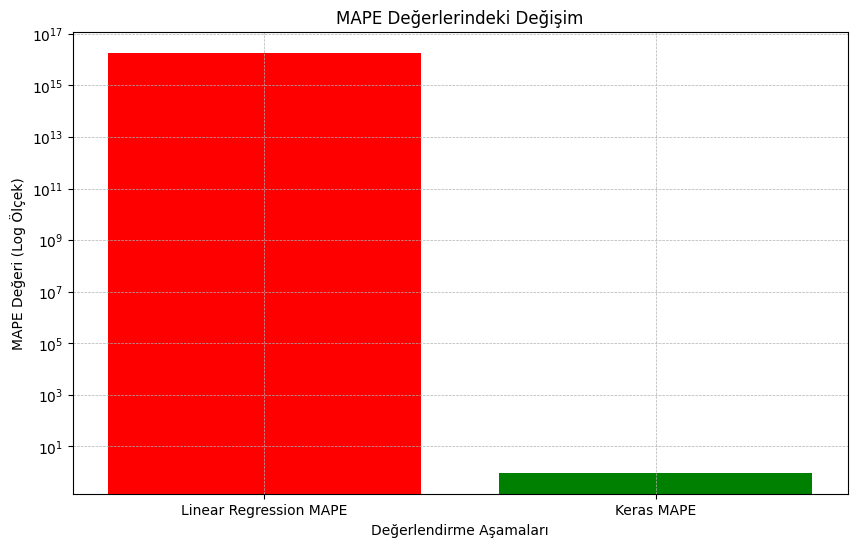

In [35]:
import matplotlib.pyplot as plt
mape_values = [1.84 * 10**16, 0.9536]
labels = ['Linear Regression MAPE', 'Keras MAPE']
plt.figure(figsize=(10, 6))
plt.bar(labels, mape_values, color=['red', 'green'])
plt.yscale('log')
plt.title('MAPE Değerlerindeki Değişim')
plt.ylabel('MAPE Değeri (Log Ölçek)')
plt.xlabel('Değerlendirme Aşamaları')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [37]:
test.tail(1)

,id,date,country,store,product,year,month,day
72901,303031,2019-03-22,0,0,5,2019,3,22
